# Syed Arsal Ahmad
# I191878
# DSN

In [1]:
import cv2
import os
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Reading images into 1 size

In [2]:
files = os.listdir("images")

In [3]:
len(files)

516

In [4]:
path = "images/"   ## ALL FILES are in Images folder.
images = [0]*len(files)
count = 0
tb = []
dup = []
for i in files:
    t=i.split("_")
    x = t[1].split(".")
    x = int(x[0])
    d = cv2.imread(path+i)
    if d is None:
        tb.append(x-1)
    else:
        images[x-1] = cv2.resize(d, (320, 320))  ## Resize and added to images according to the name. eg IMG_1 will be added to 0 in list.
    print(count+1)
    count=count+1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [ ]:
files = os.listdir("images")
path = "images/"   ## ALL FILES are in Images folder.
images = []
count = 0
tb = []
dup = []
for i in files:
    d = cv2.imread(path+i)
    images.append(cv2.resize(d, (200, 200)))  ## Resize and added to images according to the name. eg IMG_1 will be added to 0 in list.
    

# Step 1: Clustering and choosing 70% from each dataset

In [5]:
temp = []  ## images flattened for elbow method
for i in images:
    temp.append(i.flatten())

In [6]:
mode = KMeans()   ## Checked for each value of k
visualizer1 = KElbowVisualizer(mode, k=(2,15))

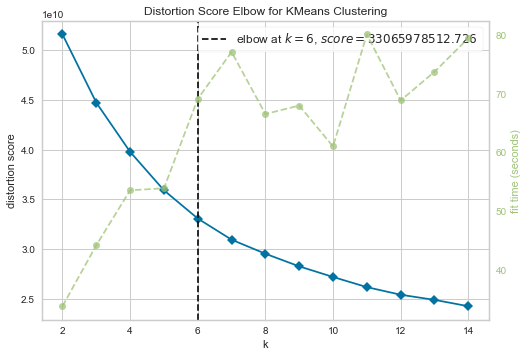

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [39]:
visualizer1.fit(np.array(temp))    ## Visualizer shown
visualizer1.show()

K = 6 is the ideal one according to Elbow Method

In [7]:
model = KMeans(6)  ## Model made with 6 clusters as Elbow Method showed 6
model.fit(temp)

KMeans(n_clusters=6)

In [8]:
df = pd.read_csv("Data_labels.csv")  ## Data labels read

In [9]:
len(images)

516

In [10]:
df['images'] = images  ## Images added to that df to maintain all.

In [11]:
df.head()

,Image_name,level,images
0,IMG_1,4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
1,IMG_2,4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,IMG_3,4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
3,IMG_4,4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
4,IMG_5,4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


In [12]:
df['cluster'] = model.labels_   ## Label of each cluster in cluster column

In [13]:
df['image_data'] = temp   ## Flattened also added for maintaining

### Visualization as well

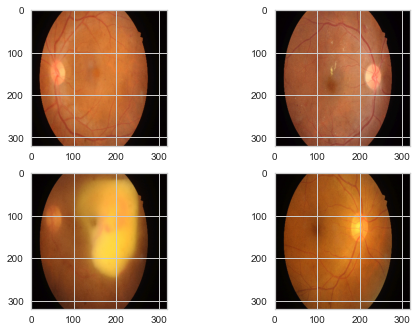

0 ------------------------------------


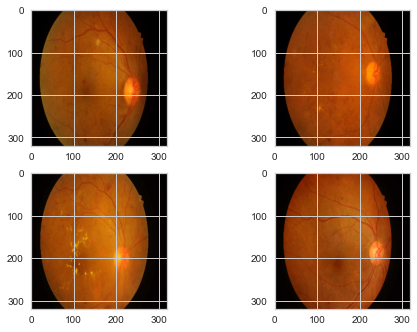

1 ------------------------------------


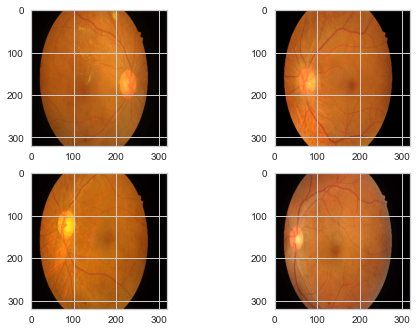

2 ------------------------------------


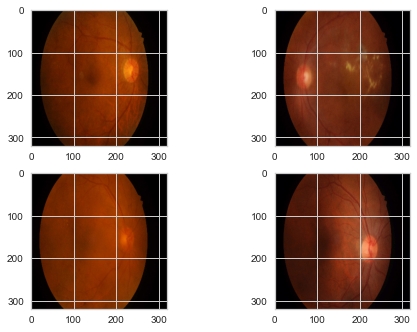

3 ------------------------------------


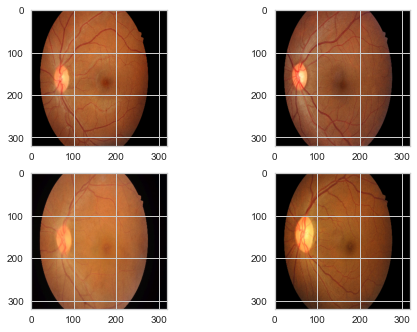

4 ------------------------------------


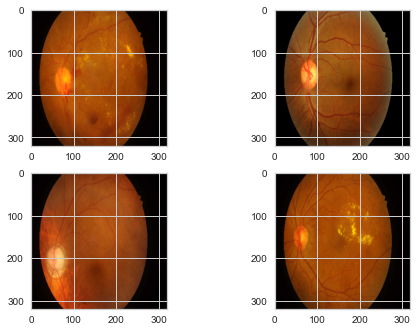

5 ------------------------------------


In [80]:
final_dataset = pd.DataFrame()   ## 70% of each clusted append to this
for i in range(0, 6):
    df2 = df.loc[df['cluster'] == i]  ## df made with each cluster label
    final_dataset = final_dataset.append(df2.sample(frac=0.7))   ##  70% of each of that temporary df
    t = df2.images.sample(n=4)
    t1 = [0]*4
    count = 0
    for j in t:
        t1[count] = j
        count=count+1

    f, axarr = plt.subplots(2,2)
    tx = cv2.cvtColor(t1[0], cv2.COLOR_BGR2RGB)
    axarr[0, 0].imshow(tx)
    tz = cv2.cvtColor(t1[1], cv2.COLOR_BGR2RGB)
    axarr[0, 1].imshow(tz)
    tx = cv2.cvtColor(t1[2], cv2.COLOR_BGR2RGB)
    axarr[1, 0].imshow(tx)
    tx = cv2.cvtColor(t1[3], cv2.COLOR_BGR2RGB)
    axarr[1, 1].imshow(tx)
    plt.show()
    print(i, "------------------------------------")


In [15]:
final_dataset = final_dataset.sample(frac=1)   ## This shuffles the whole dataset

In [16]:
final_dataset.reset_index(inplace=True)  ## Index reset

In [17]:
final_dataset.drop(['index'], axis=1, inplace=True)    ## drop index column

In [18]:
images2 = final_dataset.images    ## 70% photos that we chose now here.

In [19]:
levels = final_dataset.level

# Segmentation

In [20]:
segmented = []       ## All segmented photos in Segments
for i in images2:
    img = i
    img = cv2.medianBlur(img,5)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
    th2 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
                cv2.THRESH_BINARY,11,2)
    th3 = cv2.adaptiveThreshold(img,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
                cv2.THRESH_BINARY,11,2)

    segmented.append(th3)
    

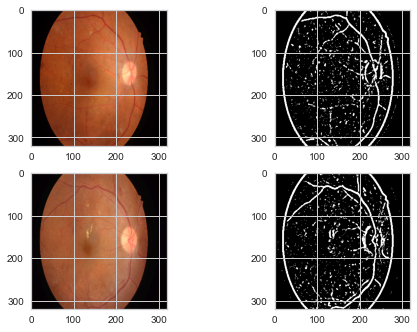

In [21]:
f, axarr = plt.subplots(2,2)           ## Original and Segmented shown
tx = cv2.cvtColor(images2[0], cv2.COLOR_BGR2RGB)
axarr[0,0].imshow(tx)
axarr[0,1].imshow(segmented[0])
tx = cv2.cvtColor(images2[1], cv2.COLOR_BGR2RGB)
axarr[1,0].imshow(tx)
axarr[1,1].imshow(segmented[1])

In [22]:
segflatten=[]      ## Flattenned segmented photos in segflatten
imge = []         ## Flattenned original complete photos in imge
for i in segmented:
    segflatten.append(i.flatten())
for j in images2:
    imge.append(j.flatten())

# ML models

### Train Test Split both segmented and original

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(imge, levels, test_size=0.2, random_state=0)  ## Original

In [25]:
Xtrain, Xtest, ytrain, ytest = train_test_split(segflatten, levels, test_size=0.2, random_state=0)  ## Segmented

# ML Models

In [26]:

namess = ['CNN', 'ANN']
names1 = ['CNN', 'ANN','Naive Bayes', 'Logistic Regression']

chunk = [8,9,10,11,12]
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

In [27]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import time

### Time to Fit

In [28]:
gnb = GaussianNB() ## For Original
clf = LogisticRegression(solver='lbfgs', max_iter=400,random_state=0)

gnb1 = GaussianNB()  ## For Segmented
clf1 = LogisticRegression(random_state=0)

In [29]:
times1 = [] ## Time taken to fit

In [30]:
                                        ## Naive Bayes  Original Photo
start = time.time()
gnb.fit(X_train, y_train)
t = time.time() - start
times1.append(round(t, 4))
print("Time taken to Fit Model: ", t)

Time taken to Fit Model:  0.9998273849487305


In [31]:
start = time.time()   ## Naive Bayes Segmented Photos
gnb1.fit(Xtrain, ytrain)
t = time.time() - start
times1.append(round(t, 4))
print("Time taken to Fit Model: ", t)

Time taken to Fit Model:  0.32173681259155273


In [32]:
                          ## Logistic Regression  Original Photo   Takes long
start = time.time()
clf.fit(X_train, y_train)
t = time.time() - start
times1.append(round(t, 4))
print("Time taken to Fit Model: ", t)

Time taken to Fit Model:  116.64250874519348


In [33]:
start = time.time()   ## Logistic Regression Segmented Photos  Takes long
clf1.fit(Xtrain, ytrain)
t = time.time() - start
times1.append(round(t, 4))
print("Time taken to Fit Model: ", t)

Time taken to Fit Model:  9.998087167739868


In [36]:
namesml = ['Naive Bayes Org', 'Naive Bayes Seg', 'Logistic Regression Org', 'Logistic Regression Seg']

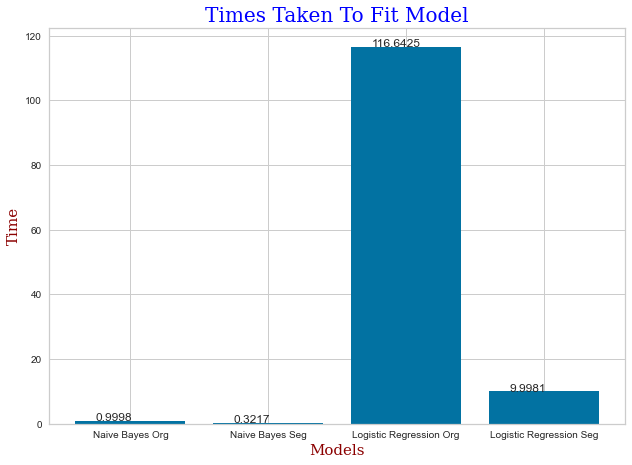

In [37]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(namesml,times1)
for index, value in enumerate(times1):
    plt.text(index-0.25, value+0.01, str(value))
plt.title("Times Taken To Fit Model", fontdict = font1)
plt.ylabel("Time", fontdict = font2)
plt.xlabel("Models", fontdict = font2)
plt.show()

Both ML models fit much faster on Segmented Data but Logistic's time difference is a lot

### Accuracies

In [38]:
fitnesses=[]
times = []

In [39]:
start = time.time()
pred = gnb.predict(X_test)   ## Naive Bayes for Original
t = time.time() - start
times.append(round(t, 4))

fit = gnb.score(X_test, y_test)     ## Accuracy of Naive Bayes on Original
fitnesses.append(round(fit, 4))
print(fit*100)

25.0


In [40]:
start = time.time()
pred = gnb1.predict(Xtest)   ## Naive Bayes for Segmented
t = time.time() - start
times.append(round(t, 4))

fit = gnb1.score(Xtest, ytest)     ## Accuracy of Naive Bayes on Segmented
fitnesses.append(round(fit, 4))
print(fit*100)

34.72222222222222


In [41]:
start = time.time()
pred = clf.predict(X_test)   ## Logistic Regression on Original
t = time.time() - start
times.append(round(t, 4))

fit = clf.score(X_test, y_test)     ## Accuracy of Logistic on Original
fitnesses.append(round(fit, 4))
print(fit*100)

34.72222222222222


In [42]:
start = time.time()
pred = clf1.predict(Xtest)   ## Logistic Regression on Segmented
t = time.time() - start
times.append(round(t, 4))

fit = clf1.score(Xtest, ytest)     ## Accuracy of Logistic on Segmented
fitnesses.append(round(fit, 4))
print(fit*100)

43.05555555555556


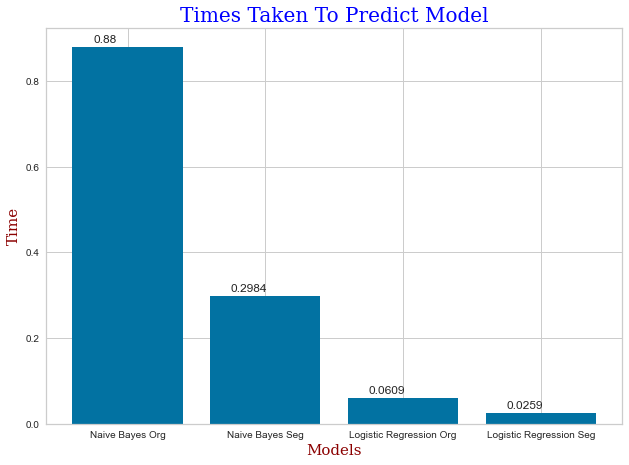

In [43]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(namesml,times)
for index, value in enumerate(times):
    plt.text(index-0.25, value+0.01, str(value))
plt.title("Times Taken To Predict Model", fontdict = font1)
plt.ylabel("Time", fontdict = font2)
plt.xlabel("Models", fontdict = font2)
plt.show()

Timing Wise, Naive Bayes takes longer than Logistic Regression for Predicting. Here also Segmented is faster.

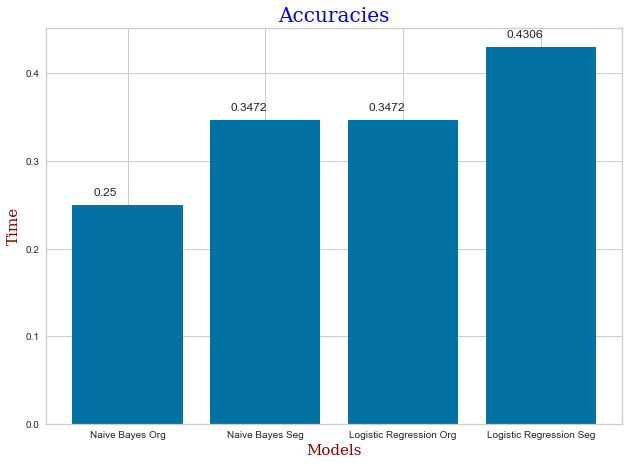

In [44]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(namesml,fitnesses)
for index, value in enumerate(fitnesses):
    plt.text(index-0.25, value+0.01, str(value))
plt.title("Accuracies", fontdict = font1)
plt.ylabel("Time", fontdict = font2)
plt.xlabel("Models", fontdict = font2)
plt.show()

Score for Segmented was better for both. Logistic Regression had better accuracy on our data overall

# Neural Networks

In [99]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [46]:
names = ['ANN Org', 'ANN Seg', 'CNN Org', 'CNN Seg']

In [54]:
for i in range(len(segmented)):        ## Resizing for neural network
    segmented[i] = cv2.resize(segmented[i], (200, 200))
    images2[i] = cv2.resize(images2[i], (200, 200))

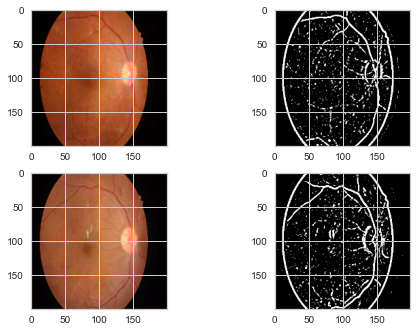

In [56]:
f, axarr = plt.subplots(2,2)           ## Original and Segmented shown
tx = cv2.cvtColor(images2[0], cv2.COLOR_BGR2RGB)
axarr[0,0].imshow(tx)
axarr[0,1].imshow(segmented[0])
tx = cv2.cvtColor(images2[1], cv2.COLOR_BGR2RGB)
axarr[1,0].imshow(tx)
axarr[1,1].imshow(segmented[1])

In [64]:
segflatten=[]      ## Flattenned segmented photos in segflatten
imge = []         ## Flattenned original complete photos in imge
for i in segmented:
    segflatten.append(i.flatten())
for j in images2:
    imge.append(j.flatten())

In [65]:
X_train, X_test, y_train, y_test = train_test_split(imge, levels, test_size=0.2, random_state=0)  ## Original

Xtrain, Xtest, ytrain, ytest = train_test_split(segflatten, levels, test_size=0.2, random_state=0)  ## Segmented

In [66]:
X_train_ten = torch.from_numpy(np.array(X_train))    ## Original Photos
#X_test_ten = torch.from_numpy(np.array(X_test))
y_train_ten = torch.from_numpy(np.array(y_train))
#y_test_ten = torch.from_numpy(np.array(y_test))

In [67]:
Xtrain_ten = torch.from_numpy(np.array(Xtrain))    ## Segmented   ## Without slash
#Xtest_ten = torch.from_numpy(np.array(Xtest))
ytrain_ten = torch.from_numpy(np.array(ytrain))
#ytest_ten = torch.from_numpy(np.array(ytest))

In [93]:
timess = []
los = []

In [94]:
input_dim=200*200*3            ## ANN Models Original Pics
hidden_dim = 800
output_dim=5

class Net(nn.Module):
    def __init__(self,input,H,output):
        super(Net,self).__init__()
        self.linear1=nn.Linear(input,H)
        self.linear2=nn.Linear(H,300)
        self.linear3=nn.Linear(300,300)
        self.linear4=nn.Linear(300,output)
 
        
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))
        x=torch.sigmoid(self.linear2(x))
        x=torch.sigmoid(self.linear3(x))
        x=self.linear4(x)
        return x

clf=Net(input_dim,hidden_dim,output_dim)

criterion=nn.CrossEntropyLoss()
optimizer=torch.optim.Adam(clf.parameters(), lr=0.01)

y = y_train_ten.to(torch.long)

learning_rate = 1e-2
loss_list = []
minn = 1000
count = 0
start = time.time()
for t in range(150):
    y_pred = clf(X_train_ten.float())
    loss = criterion(y_pred, y)
    print(loss, t)
    loss_list.append(loss.item())
    if loss.item() < loss_list[len(loss_list)-1]:
        count = count + 1
    else:
        count = 0
    if count==6:
        break
    clf.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in clf.parameters():
            param -= learning_rate * param.grad
end = time.time()
t = end - start
timess.append(round(t, 4))
los.append(loss_list[len(loss_list)-1])

tensor(1.6011, grad_fn=<NllLossBackward0>) 0
tensor(1.5611, grad_fn=<NllLossBackward0>) 1
tensor(1.5356, grad_fn=<NllLossBackward0>) 2
tensor(1.5175, grad_fn=<NllLossBackward0>) 3
tensor(1.5039, grad_fn=<NllLossBackward0>) 4
tensor(1.4940, grad_fn=<NllLossBackward0>) 5
tensor(1.4865, grad_fn=<NllLossBackward0>) 6
tensor(1.4808, grad_fn=<NllLossBackward0>) 7
tensor(1.4764, grad_fn=<NllLossBackward0>) 8
tensor(1.4728, grad_fn=<NllLossBackward0>) 9
tensor(1.4700, grad_fn=<NllLossBackward0>) 10
tensor(1.4678, grad_fn=<NllLossBackward0>) 11
tensor(1.4660, grad_fn=<NllLossBackward0>) 12
tensor(1.4645, grad_fn=<NllLossBackward0>) 13
tensor(1.4634, grad_fn=<NllLossBackward0>) 14
tensor(1.4622, grad_fn=<NllLossBackward0>) 15
tensor(1.4613, grad_fn=<NllLossBackward0>) 16
tensor(1.4604, grad_fn=<NllLossBackward0>) 17
tensor(1.4599, grad_fn=<NllLossBackward0>) 18
tensor(1.4594, grad_fn=<NllLossBackward0>) 19
tensor(1.4590, grad_fn=<NllLossBackward0>) 20
tensor(1.4586, grad_fn=<NllLossBackward0>) 2

In [95]:
input_dim=200*200*1 # as only black white.       ANN for Segmented
hidden_dim = 300
output_dim=5

class Net(nn.Module):
    def __init__(self,input,H,output):
        super(Net,self).__init__()
        self.linear1=nn.Linear(input,H)
        self.linear2=nn.Linear(H,100)
        self.linear3=nn.Linear(100,100)
        self.linear4=nn.Linear(100,output)
 
        
    def forward(self,x):
        x=torch.sigmoid(self.linear1(x))
        x=torch.sigmoid(self.linear2(x))
        x=torch.sigmoid(self.linear3(x))
        x=self.linear4(x)
        return x

clf1=Net(input_dim,hidden_dim,output_dim)

criterion=nn.CrossEntropyLoss()         ## Cross entropy loss for both
optimizer=torch.optim.Adam(clf1.parameters(), lr=0.01)   ## Adam Optimizer for both

y = ytrain_ten.to(torch.long)

learning_rate = 1e-2
loss_list = []
minn = 1000
count = 0
start = time.time()
for t in range(150):
    y_pred = clf1(Xtrain_ten.float())
    loss = criterion(y_pred, y)
    print(loss, t)
    loss_list.append(loss.item())
    if loss.item() < loss_list[len(loss_list)-1]:
        count = count + 1
    else:
        count = 0
    if count==6:
        break
    clf1.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in clf1.parameters():
            param -= learning_rate * param.grad
end = time.time()
t = end - start
timess.append(round(t, 4))
los.append(loss_list[len(loss_list)-1])

tensor(1.8196, grad_fn=<NllLossBackward0>) 0
tensor(1.7765, grad_fn=<NllLossBackward0>) 1
tensor(1.7422, grad_fn=<NllLossBackward0>) 2
tensor(1.7120, grad_fn=<NllLossBackward0>) 3
tensor(1.6854, grad_fn=<NllLossBackward0>) 4
tensor(1.6618, grad_fn=<NllLossBackward0>) 5
tensor(1.6408, grad_fn=<NllLossBackward0>) 6
tensor(1.6220, grad_fn=<NllLossBackward0>) 7
tensor(1.6051, grad_fn=<NllLossBackward0>) 8
tensor(1.5901, grad_fn=<NllLossBackward0>) 9
tensor(1.5768, grad_fn=<NllLossBackward0>) 10
tensor(1.5649, grad_fn=<NllLossBackward0>) 11
tensor(1.5543, grad_fn=<NllLossBackward0>) 12
tensor(1.5448, grad_fn=<NllLossBackward0>) 13
tensor(1.5365, grad_fn=<NllLossBackward0>) 14
tensor(1.5290, grad_fn=<NllLossBackward0>) 15
tensor(1.5223, grad_fn=<NllLossBackward0>) 16
tensor(1.5163, grad_fn=<NllLossBackward0>) 17
tensor(1.5110, grad_fn=<NllLossBackward0>) 18
tensor(1.5062, grad_fn=<NllLossBackward0>) 19
tensor(1.5019, grad_fn=<NllLossBackward0>) 20
tensor(1.4981, grad_fn=<NllLossBackward0>) 2

In [134]:
tv = torch.tensor(images2)
tseg = torch.tensor(segmented)

In [135]:
X_train, X_test, y_train, y_test = train_test_split(tv, levels, test_size=0.2, random_state=0)  ## Original

Xtrain, Xtest, ytrain, ytest = train_test_split(tseg, levels, test_size=0.2, random_state=0)  ## Segmented

In [234]:
class Net1(nn.Module):      ## CNN Model for original
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(200, 200, kernel_size = 3, padding = 1),   ## 200 inputs
            nn.ReLU(),
            nn.Conv2d(200,200, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
        
            nn.Conv2d(200, 128, kernel_size = 2, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(128 ,128, kernel_size = 2, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(128, 256, kernel_size = 2, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(256,256, kernel_size = 2, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Flatten(),
            nn.Linear(6656,1024),
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512,5)   ## 5 outputs
        )
    
    def forward(self, xb):
        return self.network(xb)

In [242]:
cnn = Net1()

In [241]:
criterion=nn.CrossEntropyLoss()        ## CNN for Segmented pics
optimizer=torch.optim.Adam(cnn.parameters(), lr=0.01)

y = y_train_ten.to(torch.long)

learning_rate = 1e-2
loss_list = []
minn = 1000
count = 0
start = time.time()
for t in range(150):
    y_pred = cnn(X_train.float())
    loss = criterion(y_pred, y)
    print(loss, t)
    loss_list.append(loss.item())
    if loss.item() < loss_list[len(loss_list)-1]:
        count = count + 1
    else:
        count = 0
    if count==6:    ## condition if repeatedly going down 6 times
        break
    cnn.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in cnn.parameters():
            param -= learning_rate * param.grad
end = time.time()
t = end - start
timess.append(round(t, 4))
los.append(loss_list[len(loss_list)-1])

tensor(1.6027, grad_fn=<NllLossBackward0>) 0
tensor(1.5942, grad_fn=<NllLossBackward0>) 1
tensor(1.5864, grad_fn=<NllLossBackward0>) 2
tensor(1.5787, grad_fn=<NllLossBackward0>) 3
tensor(1.5705, grad_fn=<NllLossBackward0>) 4
tensor(1.5614, grad_fn=<NllLossBackward0>) 5
tensor(1.5515, grad_fn=<NllLossBackward0>) 6
tensor(1.5405, grad_fn=<NllLossBackward0>) 7
tensor(1.5284, grad_fn=<NllLossBackward0>) 8
tensor(1.5151, grad_fn=<NllLossBackward0>) 9
tensor(1.5013, grad_fn=<NllLossBackward0>) 10
tensor(1.4883, grad_fn=<NllLossBackward0>) 11
tensor(1.4771, grad_fn=<NllLossBackward0>) 12
tensor(1.4685, grad_fn=<NllLossBackward0>) 13
tensor(1.4626, grad_fn=<NllLossBackward0>) 14
tensor(1.4587, grad_fn=<NllLossBackward0>) 15
tensor(1.4560, grad_fn=<NllLossBackward0>) 16
tensor(1.4541, grad_fn=<NllLossBackward0>) 17
tensor(1.4525, grad_fn=<NllLossBackward0>) 18
tensor(1.4512, grad_fn=<NllLossBackward0>) 19
tensor(1.4500, grad_fn=<NllLossBackward0>) 20
tensor(1.4490, grad_fn=<NllLossBackward0>) 2

In [243]:
class Net2(nn.Module):      ## CNN Model for segmented
    def __init__(self):
        super().__init__()
        self.network = nn.Sequential(
            
            nn.Conv2d(288, 200, kernel_size = 3, padding = 1),
            nn.ReLU(),
            nn.Conv2d(200,200, kernel_size = 3, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
        
            nn.Conv2d(200, 128, kernel_size = 2, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(128 ,128, kernel_size = 2, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Conv2d(128, 288, kernel_size = 2, stride = 1, padding = 1),
            nn.ReLU(),
            nn.Conv2d(288,288, kernel_size = 2, stride = 1, padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(2,2),
            
            nn.Flatten(),
            nn.Linear(676,256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128,5)
        )
    
    def forward(self, xb):
        return self.network(xb)

In [244]:
cnn1 = Net2()

In [245]:
criterion=nn.CrossEntropyLoss() ## CNN1 for Segmented
optimizer=torch.optim.Adam(cnn1.parameters(), lr=0.01)

y = ytrain_ten.to(torch.long)

learning_rate = 1e-2
loss_list = []
minn = 1000
count = 0
start = time.time()
for t in range(150):
    y_pred = cnn1(Xtrain.float())
    loss = criterion(y_pred, y)
    print(loss, t)
    loss_list.append(loss.item())
    if loss.item() < loss_list[len(loss_list)-1]:
        count = count + 1
    else:
        count = 0
    if count==6:
        break
    cnn1.zero_grad()
    loss.backward()
    with torch.no_grad():
        for param in cnn1.parameters():
            param -= learning_rate * param.grad
end = time.time()
t = end - start
timess.append(round(t, 4))
los.append(loss_list[len(loss_list)-1])

tensor(1.6360, grad_fn=<NllLossBackward0>) 0
tensor(1.5986, grad_fn=<NllLossBackward0>) 1
tensor(1.5776, grad_fn=<NllLossBackward0>) 2
tensor(1.5578, grad_fn=<NllLossBackward0>) 3
tensor(1.5360, grad_fn=<NllLossBackward0>) 4
tensor(1.5128, grad_fn=<NllLossBackward0>) 5
tensor(1.4866, grad_fn=<NllLossBackward0>) 6
tensor(1.4588, grad_fn=<NllLossBackward0>) 7
tensor(1.4294, grad_fn=<NllLossBackward0>) 8
tensor(1.4001, grad_fn=<NllLossBackward0>) 9
tensor(1.3765, grad_fn=<NllLossBackward0>) 10
tensor(1.3738, grad_fn=<NllLossBackward0>) 11
tensor(1.4778, grad_fn=<NllLossBackward0>) 12
tensor(1.5499, grad_fn=<NllLossBackward0>) 13
tensor(1.4116, grad_fn=<NllLossBackward0>) 14
tensor(1.3263, grad_fn=<NllLossBackward0>) 15
tensor(1.2891, grad_fn=<NllLossBackward0>) 16
tensor(1.2676, grad_fn=<NllLossBackward0>) 17
tensor(1.2506, grad_fn=<NllLossBackward0>) 18
tensor(1.2372, grad_fn=<NllLossBackward0>) 19
tensor(1.2299, grad_fn=<NllLossBackward0>) 20
tensor(1.2316, grad_fn=<NllLossBackward0>) 2

In [250]:
for i in range(4):
    los[i] = (round(los[i], 4))

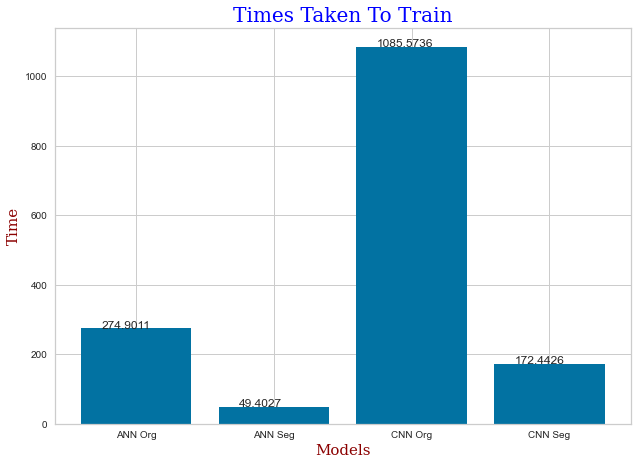

In [253]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(names,timess)
for index, value in enumerate(timess):
    plt.text(index-0.25, value+0.01, str(value))
plt.title("Times Taken To Train", fontdict = font1)
plt.ylabel("Time", fontdict = font2)
plt.xlabel("Models", fontdict = font2)
plt.show()

ANN tok lesser time overall. Segmented images saved a lot of time

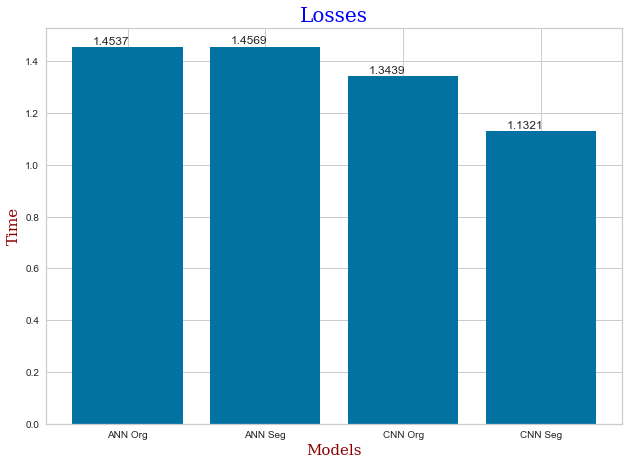

In [257]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(names,los)
for index, value in enumerate(los):
    plt.text(index-0.25, value+0.01, str(value))
    plt.title("Losses", fontdict = font1)
plt.ylabel("Time", fontdict = font2)
plt.xlabel("Models", fontdict = font2)
plt.show()

For our data, ANN didn't have much difference for Segmented and Originals pics. Had a higher loss overall too.

CNN had a lower loss, with even further lower on Segmented Images